# Notebook Requirements

In [1]:
# Environment Downloads (Uncomment and run when first enter notebook - will need to restart runtime)

# !pip uninstall numpy
# !pip install "numpy<2.0"
# !pip install --force-reinstall gensim pandas
# !pip install tensorflow keras
# !pip install transformers torch

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/numpy-config
    /usr/local/lib/python3.11/dist-packages/numpy-2.0.2.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1-0352e75f.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99-934c22de.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-99b71e71.so
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 76.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which i

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [1]:
# Connect to Drive

from google.colab import drive
drive.mount('/content/drive')

# Required Imports
import matplotlib.pyplot as plt
import gensim.downloader as api
import seaborn as sns
import pandas as pd
import numpy as np
import string
import gensim
import torch
import nltk
import os
import re

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from keras.models import Sequential

from numpy import hstack
from numpy import array

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model

from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer

from scipy.spatial.distance import cosine

from gensim.models import KeyedVectors
from gensim import corpora

# Required Downloads
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('punkt')

Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Load Word2Vec Model (Uncomment to load again)

w2v_model = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


# 1 Word Prediction with Word2Vec and LSTM (50 Points)

## Part 1

In [3]:
# (1) Download the News Data File

!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/test.csv

--2025-05-02 23:39:38--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1857427 (1.8M) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]   1.77M  --.-KB/s    in 0.03s   

2025-05-02 23:39:38 (67.5 MB/s) - ‘test.csv’ saved [1857427/1857427]



## Part 2

In [4]:
# Load data file with Pandas

df = pd.read_csv('test.csv', header=None)
df.columns = ['Class Index', 'Title', 'Description']
df = df.dropna(subset=['Description'])

In [5]:
# Preprocess the data

# Set the stopword toggle
include_stopwords = True

# Initialize stemmer
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text, include_stopwords=False, stem=False):
    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize
    words = text.split()

    # Remove stopwords if flag is False
    if not include_stopwords:
        words = [w for w in words if w not in stop_words]

    # Optional: Stemming
    if stem:
        words = [stemmer.stem(w) for w in words]

    return ' '.join(words)

df['cleaned_description'] = df['Description'].apply(
    lambda x: preprocess_text(x, include_stopwords=include_stopwords, stem=True)
)

## Part 3

### 3.1

In [6]:
# Encode Collection Using Word2Vec

documents = df['cleaned_description']

longest_sentences = []

for doc in documents:
    # Step 1: Split the doc into sentences
    sentences = sent_tokenize(doc)

    # Step 2: Find the sentence with the most words
    max_sentence = max(sentences, key=lambda s: len(word_tokenize(s)))

    longest_sentences.append(max_sentence)

# Build one 100-d time series per document
all_series = []

for sent in longest_sentences:
    tokens = word_tokenize(sent.lower())
    vectors = [w2v_model[word] for word in tokens if word in w2v_model]
    if vectors:
        all_series.append(np.vstack(vectors))

In [7]:
# Brownlee (2020)

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
  X, y = list(), list()
  for i in range(len(sequences)):
    # find the end of this pattern
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out

    # check if we are beyond the dataset
    if out_end_ix > len(sequences):
      break

    # gather input and output parts of the pattern
    seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
    X.append(seq_x)
    y.append(seq_y)

  return array(X), array(y)

In [8]:
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

X_all, y_all = [], []

for doc_series in all_series:
    if doc_series.shape[0] >= n_steps_in + n_steps_out:
      X, y = split_sequences(doc_series, n_steps_in, n_steps_out)
      X_all.append(X)
      y_all.append(y)

X = np.vstack(X_all)
y = np.vstack(y_all)

### 3.2

In [9]:
# Training LSTM Model

n_features = 100

def train_single_model(activation_function, X, y, n_steps_in, n_features, n_steps_out, epochs=10):
    model = Sequential()
    model.add(LSTM(200, activation=activation_function, input_shape=(n_steps_in, n_features)))
    model.add(RepeatVector(n_steps_out))
    model.add(LSTM(200, activation=activation_function, return_sequences=True))
    model.add(TimeDistributed(Dense(n_features)))
    model.compile(optimizer='adam', loss='mse')

    model.fit(X, y, epochs=epochs, verbose=1)

    return model

# # Model with 'ReLU' activation
# model_relu_with_stopwords = train_single_model('relu', X, y, n_steps_in, n_features, n_steps_out)

# # Model with 'tanh' activation
# model_tanh_with_stopwords = train_single_model('tanh', X, y, n_steps_in, n_features, n_steps_out)

In [ ]:
# Save Models to Google Drive

# Define the directory in Google Drive to save the models
# model_dir = '/content/drive/My Drive/saved_models/'  # Change this path as needed

# Create the directory if it doesn't exist
# os.makedirs(model_dir, exist_ok=True)

# Save model_relu to Google Drive
# model_relu_with_stopwords.save(os.path.join(model_dir, 'model_relu_with_stopwords.keras'))
# print("ReLU model saved to Google Drive.")

# # Save model_tanh to Google Drive
# model_tanh_with_stopwords.save(os.path.join(model_dir, 'model_tanh_with_stopwords.keras'))
# print("Tanh model saved to Google Drive.")

ReLU model saved to Google Drive.
Tanh model saved to Google Drive.


In [10]:
# load models

# Load models from Google Drive
model_relu = load_model('/content/drive/My Drive/saved_models/relu_model.keras')
model_tanh = load_model('/content/drive/My Drive/saved_models/tanh_model.keras')

model_relu_with_stopwords = load_model('/content/drive/My Drive/saved_models/model_relu_with_stopwords.keras')
model_tanh_with_stopwords = load_model('/content/drive/My Drive/saved_models/model_tanh_with_stopwords.keras')

print("Models loaded from Google Drive!")

Models loaded from Google Drive!


### 3.3

In [ ]:
# Make Predictions
y_pred_relu = model_relu.predict(X, verbose=1)
y_pred_tanh = model_tanh.predict(X, verbose=1)

y_pred_relu_with_stopwords = model_relu_with_stopwords.predict(X, verbose=1)
y_pred_tanh_with_stopwords = model_tanh_with_stopwords.predict(X, verbose=1)

5217/5217 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


In [ ]:
# Compute RMSE

def compute_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2, axis=(1,2)))  # Shape: (num_samples,)

rmse_relu_with_stopwords = compute_rmse(y, y_pred_relu_with_stopwords)
rmse_tanh_with_stopwords = compute_rmse(y, y_pred_tanh_with_stopwords)

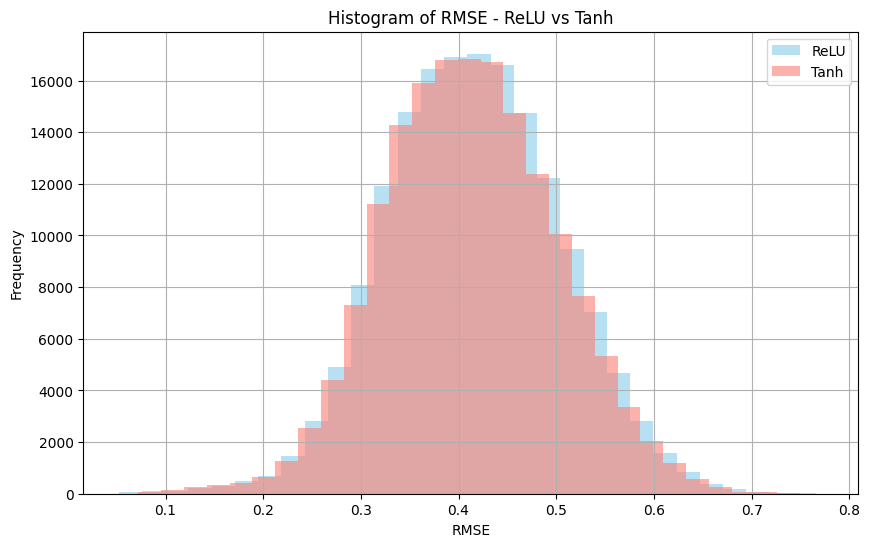

In [ ]:
# Plot Histogram

plt.figure(figsize=(10, 6))
plt.hist(rmse_relu_with_stopwords, bins=30, alpha=0.6, color='skyblue', label='ReLU')
plt.hist(rmse_tanh_with_stopwords, bins=30, alpha=0.6, color='salmon', label='Tanh')
plt.title('Histogram of RMSE - ReLU vs Tanh')
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


### 3.4

In [ ]:
# Mean RMSE for ReLU, tanh (rerun with stopwards=True for RMSE values with stopwords)

# print("Mean RMSE (ReLU):", np.mean(rmse_relu))
# print("Mean RMSE (Tanh):", np.mean(rmse_tanh))

print("Mean RMSE (ReLU):", np.mean(rmse_relu_with_stopwords))
print("Mean RMSE (Tanh):", np.mean(rmse_tanh_with_stopwords))

Mean RMSE (ReLU): 0.4160728
Mean RMSE (Tanh): 0.41206867


In [13]:
# Grab longest sentence

longest_sentence_idx = np.argmax([len(doc) for doc in all_series])
longest_doc = all_series[longest_sentence_idx]

# Set model_best to best model (was tanh from testing)

model_best = model_tanh
model_best_with_stopwords = model_tanh_with_stopwords

last_input = longest_doc[-n_steps_in:]
last_input = last_input.reshape((1, n_steps_in, n_features))

predicted_output = model_best_with_stopwords.predict(last_input)
predicted_vectors = predicted_output[0]

print(predicted_vectors)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step
[[-1.00302562e-01  9.89761129e-02  3.57045054e-01 -2.25238711e-01
   3.06784399e-02  1.70965716e-01 -1.56722486e-01  1.96904033e-01
  -1.47740483e-01  6.07621707e-02  4.80650440e-02  4.44993712e-02
   2.04850629e-01  8.40457156e-02  1.85412541e-01 -2.35103399e-01
   2.24898040e-01  4.61177975e-02 -3.38329494e-01  1.77266866e-01
   2.63508946e-01  2.49886094e-03  2.51370490e-01  3.24672088e-02
   2.05454081e-01 -4.59751971e-02 -4.81886417e-02 -4.49545056e-01
  -1.03381649e-02 -1.74292296e-01 -9.07695144e-02  3.81481111e-01
  -1.25496462e-02  6.80311471e-02 -3.66234370e-02  2.31492579e-01
   6.53504655e-02  3.21881652e-01 -4.38304096e-02 -1.52843341e-01
  -4.10643876e-01 -2.55095124e-01  1.13993004e-01 -3.15700442e-01
  -8.87833759e-02  2.05434766e-02  2.17196718e-01 -3.23589861e-01
  -6.72323257e-02 -6.36372566e-01 -2.69194543e-02 -3.96088883e-02
   1.30043909e-01  1.02159464e+00 -2.94798136e-01 -2.28540421e+00
   2.40566023e-03 -2.68618882e-01  1.

### 3.5

In [15]:
for i, vec in enumerate(predicted_vectors):
    try:
        similar_words = w2v_model.similar_by_vector(vec, topn=5)
        print(f"\nTop 5 similar words for predicted word vector {i+1}:")
        for word, similarity in similar_words:
            print(f"{word} (similarity: {similarity:.4f})")
    except Exception as e:
        print(f"Error for vector {i+1}: {e}")


Top 5 similar words for predicted word vector 1:
this (similarity: 0.9196)
one (similarity: 0.9137)
but (similarity: 0.9117)
it (similarity: 0.9116)
well (similarity: 0.9111)

Top 5 similar words for predicted word vector 2:
it (similarity: 0.9172)
this (similarity: 0.9165)
so (similarity: 0.9153)
even (similarity: 0.9105)
well (similarity: 0.9097)


# 2 Word Prediction with Transformers (30 Points)


## Part 1

In [3]:
# (1) Download the News Data File

!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/test.csv

df = pd.read_csv('test.csv', header=None)
df.columns = ['Class Index', 'Title', 'Description']
df = df.dropna(subset=['Description'])

--2025-05-02 16:54:13--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1857427 (1.8M) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]   1.77M  --.-KB/s    in 0.03s   

2025-05-02 16:54:13 (69.5 MB/s) - ‘test.csv’ saved [1857427/1857427]



## Part 2

In [4]:
def preprocess_text(text, remove_punctuation=True):
    text = text.lower()
    text = re.sub(r'\d+', '', text)

    if remove_punctuation:
        text = text.translate(str.maketrans('', '', string.punctuation))

    words = word_tokenize(text)
    return ' '.join(words), text

longest_sentences = []

for doc in df['Description']:
    sentences = sent_tokenize(doc)
    if not sentences:
        continue
    longest = max(sentences, key=lambda s: len(word_tokenize(s)))
    longest_sentences.append(longest)

cleaned_sentences_no_punct = [preprocess_text(s, remove_punctuation=True)[0] for s in longest_sentences]
cleaned_sentences_with_punct = [preprocess_text(s, remove_punctuation=False)[1] for s in longest_sentences]


## Part 3

### 3.1

In [5]:
gpt2_model = AutoModelForCausalLM.from_pretrained("gpt2")
gpt2_tokenizer = AutoTokenizer.from_pretrained("gpt2")

bert_pipeline = pipeline('fill-mask', model='bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


In [10]:
def predict_with_bert(prompt, period):
    if not prompt.strip():
      return None
    prompt = prompt.strip() + " "
    masked_input = prompt + "[MASK]"
    if period:
        masked_input = prompt + "[MASK]."
    try:
        results = bert_pipeline(masked_input)
        return results[0]['token_str'].strip()
    except:
        return None

def predict_with_gpt2(prompt):
    inputs = gpt2_tokenizer(prompt, return_tensors="pt")
    input_ids = inputs["input_ids"]

    for id in input_ids[0]:
      word = gpt2_tokenizer.decode(id)

    with torch.no_grad():
        logits = gpt2_model(**inputs).logits[:, -1, :]

    pred_id = torch.argmax(logits).item()
    pred_word = gpt2_tokenizer.decode(pred_id)

    return pred_word.strip()

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

### 3.2

In [12]:
def get_prompt_and_actual(sentence):
    words = sentence.split()
    if len(words) < 2:
        return None, None
    prompt = " ".join(words[:-1])
    actual_word = words[-1].strip(string.punctuation)  # Remove trailing punctuation
    return prompt, actual_word

### 3.3

In [ ]:
def cosine_similarity_w2v(word1, word2, model):
    if word1 in model and word2 in model:
        return 1 - cosine(model[word1], model[word2])
    return None

In [13]:
def evaluate_predictions(sentences, model, period):
    total_predictions = 0
    correct = 0

    similarities = []

    for sentence in sentences:
        prompt, actual_word = get_prompt_and_actual(sentence)
        if prompt is None:
            continue

        predicted_word = None
        if model == 'bert':
            predicted_word = predict_with_bert(prompt, period)
        elif model == 'gpt2':
            predicted_word = predict_with_gpt2(prompt)

        sim = cosine_similarity_w2v(predicted_word, actual_word, w2v_model)

        if sim is not None:
            similarities.append(sim)

        total_predictions += 1

        # Compare BERT's prediction to the actual word
        if predicted_word.lower() == actual_word.lower():
            correct += 1

    # Compute accuracy for both models
    accuracy = correct / total_predictions if total_predictions > 0 else 0

    return accuracy, similarities

In [17]:
# Will take ~5 minutes to run (~2:30 minutes each)
bert_accuracy_no_punct, bert_similarities_no_punct = evaluate_predictions(cleaned_sentences_no_punct, 'bert', False)
bert_accuracy_with_punct, bert_similarities_with_punct = evaluate_predictions(cleaned_sentences_with_punct, 'bert', True)

# Print Accuracy Values
print(bert_accuracy_no_punct * 100)
print(bert_accuracy_with_punct * 100)

0.4868421052631579
28.039473684210524


In [16]:
# Will take ~40 minutes to run cell (~20 minutes each)

gpt2_accuracy_no_punct, gpt2_similarities_no_punct = evaluate_predictions(cleaned_sentences_no_punct, 'gpt2', False)
gpt2_accuracy_with_punct, gpt2_similarities_with_punct = evaluate_predictions(cleaned_sentences_with_punct, 'gpt2', False)

# Print Accuracy Values
print(gpt2_accuracy_no_punct * 100)
print(gpt2_accuracy_with_punct * 100)

23.56578947368421


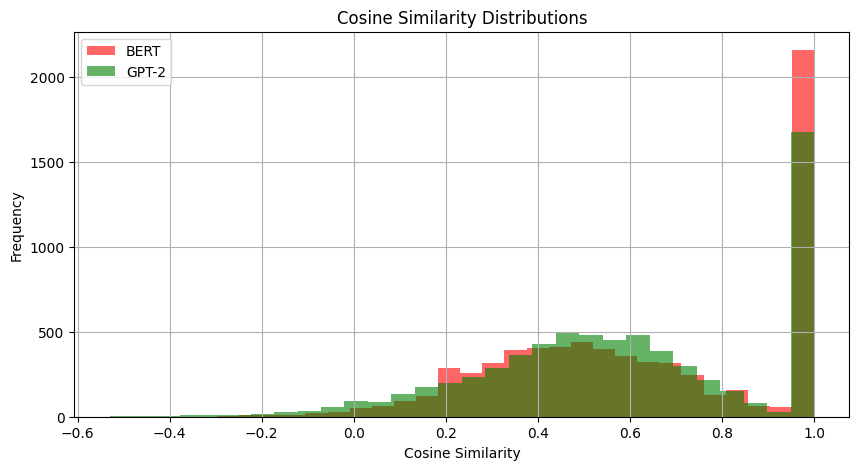

In [21]:
# Plot Graph

plt.figure(figsize=(10, 5))
plt.hist(bert_similarities_with_punct, bins=30, alpha=0.6, label='BERT', color='red')
plt.hist(gpt2_similarities_no_punct, bins=30, alpha=0.6, label='GPT-2', color='green')
plt.title("Cosine Similarity Distributions")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# 3 Topic Modeling - Multinomial PMM Model and LDA(20 points)

## Load and Preprocess Data

In [23]:
# (1) Download the News Data File

!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/test.csv

--2025-05-02 15:27:08--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1857427 (1.8M) [text/plain]
Saving to: ‘test.csv.1’

test.csv.1          100%[===================>]   1.77M  --.-KB/s    in 0.008s  

2025-05-02 15:27:09 (211 MB/s) - ‘test.csv.1’ saved [1857427/1857427]



In [24]:
# Load the data

df = pd.read_csv('test.csv')
documents = df.iloc[:, 2].dropna().tolist()

In [25]:
stop_words = set(stopwords.words('english'))

def preprocess(doc):
    # Lowercase, remove punctuation, tokenize, remove stopwords
    doc = doc.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(doc)
    return [word for word in tokens if word not in stop_words and word.isalpha()]

tokenized_docs = [preprocess(doc) for doc in documents]

## Compute matrix_of_doc term

In [7]:
# Create dictionary
D1 = corpora.Dictionary(tokenized_docs)
# Filter extremes (optional but helps reduce noise)
D1.filter_extremes(no_below=5, no_above=0.5)
# Create document-term matrix
matrix_of_doc_term = [D1.doc2bow(doc) for doc in tokenized_docs]

In [26]:
# Get LDA

lda1 = gensim.models.ldamodel.LdaModel
lda_model = lda1(matrix_of_doc_term, num_topics=10, id2word=D1, passes=100, random_state=42)

In [27]:
print("\nTop 5 words for Topic 7:")
for word, prob in lda_model.show_topic(7, topn=5):
    print(f"{word}: {prob:.4f}")


Top 5 words for Topic 7:
said: 0.0220
us: 0.0205
reuters: 0.0197
new: 0.0183
oil: 0.0139


In [28]:
diff_matrix, _ = lda_model.diff(lda_model, distance='kullback_leibler', num_words=50)

# Ensure diff_matrix is a proper 2D array
kl_matrix = np.array(diff_matrix)

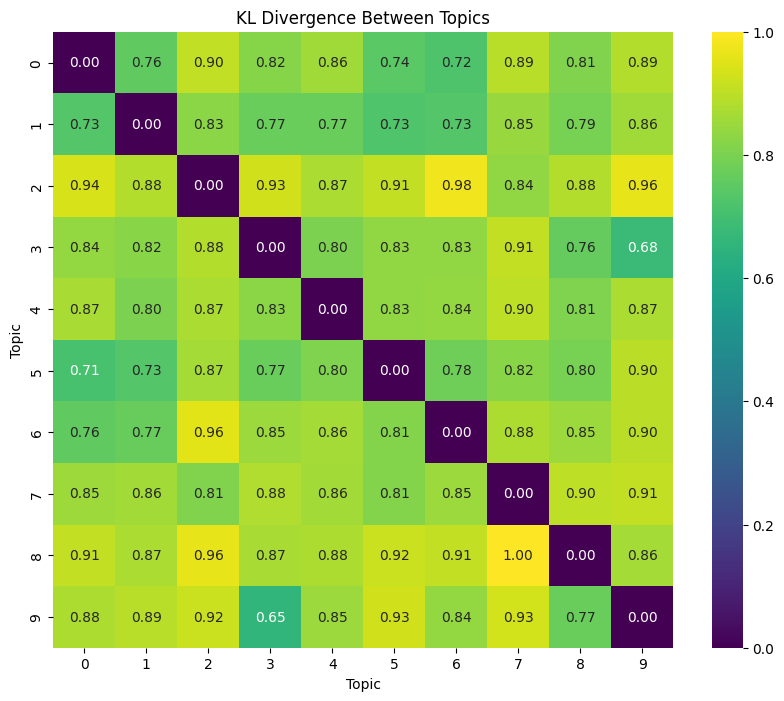

In [29]:
# Plot heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(
    kl_matrix,
    annot=True,
    cmap="viridis",
    xticklabels=range(10),
    yticklabels=range(10),
    fmt=".2f"
)
plt.title("KL Divergence Between Topics")
plt.xlabel("Topic")
plt.ylabel("Topic")
plt.show()